In [1]:
#Import the necessary libraries
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
import sklearn

# some settings
warnings.filterwarnings('ignore')
plt.rc('font', size = 14)

# IMPORTING DATA

In [2]:
path = "./tanker_data"

In [3]:
names = ['ASC', 'DHT', 'FRO', 'HAFNI.OL', "INSW", "STNG", "NAT", "OET.OL", "TNK", "TNP", "TRMD"]

In [4]:
df_dict = dict()


In [5]:
for file_name in names:
    df_dict[file_name]=pd.read_csv(path+"/"+file_name+".csv")

In [6]:
df_dict['STNG']

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-03,21.400000,21.700001,20.400000,20.600000,18.487772,705870
1,2018-12-04,20.600000,20.900000,20.000000,20.200001,18.217218,539920
2,2018-12-06,20.400000,20.600000,18.500000,19.799999,17.856480,659940
3,2018-12-07,20.100000,20.700001,19.799999,20.400000,18.397589,856930
4,2018-12-10,20.400000,20.900000,19.600000,20.500000,18.487770,1160040
...,...,...,...,...,...,...,...
1252,2023-11-24,56.900002,57.570000,56.820000,56.849998,56.486973,349500
1253,2023-11-27,56.830002,56.910000,55.759998,55.810001,55.453617,637700
1254,2023-11-28,55.799999,56.349998,54.680000,54.810001,54.460003,700100
1255,2023-11-29,54.590000,54.759998,53.580002,54.070000,54.070000,794000


PROCESSING DATA

In [66]:
#want to have return, volume returns, returns of moving averages etc.
#how to modularize this?
#implement some of the kaggle notebooks here
#find mean returns per date of week

for name in names:
    df = df_dict[name]
    df["return_1day"]=df["Close"]/df["Close"].shift(1)-1
    df["log_return"]=np.log(df["Close"]/df["Close"].shift(1))
    df['Date'] = pd.to_datetime(df['Date'])
    df['SMA_10'] = df['Close'].rolling(window=10, min_periods=1).mean()
    df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['DayOfWeek']=df['Date'].dt.day_name()
    df['log_SMA_10_return']=np.log(df["SMA_10"]/df["SMA_10"].shift(1))
    df['prev_day_log_SMA_return']=df['log_SMA_10_return'].shift(1)
    df['Month'] = df['Date'].dt.month_name()


# DATA VISUALIZING

In [32]:

df_dict['STNG']

,Date,Open,High,Low,Close,Adj Close,Volume,return_1day,log_return,SMA_10,EMA_10,Day_of_week
0,2018-12-03,21.400000,21.700001,20.400000,20.600000,18.487772,705870,NaN,NaN,20.600000,20.600000,Monday
1,2018-12-04,20.600000,20.900000,20.000000,20.200001,18.217218,539920,-0.019417,-0.019608,20.400001,20.527273,Tuesday
2,2018-12-06,20.400000,20.600000,18.500000,19.799999,17.856480,659940,-0.019802,-0.020001,20.200000,20.395041,Thursday
3,2018-12-07,20.100000,20.700001,19.799999,20.400000,18.397589,856930,0.030303,0.029853,20.250000,20.395943,Friday
4,2018-12-10,20.400000,20.900000,19.600000,20.500000,18.487770,1160040,0.004902,0.004890,20.300000,20.414862,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2023-11-24,56.900002,57.570000,56.820000,56.849998,56.486973,349500,0.002822,0.002818,56.862000,56.550715,Friday
1253,2023-11-27,56.830002,56.910000,55.759998,55.810001,55.453617,637700,-0.018294,-0.018463,56.585000,56.416040,Monday
1254,2023-11-28,55.799999,56.349998,54.680000,54.810001,54.460003,700100,-0.017918,-0.018080,56.251000,56.124033,Tuesday
1255,2023-11-29,54.590000,54.759998,53.580002,54.070000,54.070000,794000,-0.013501,-0.013593,55.815000,55.750572,Wednesday


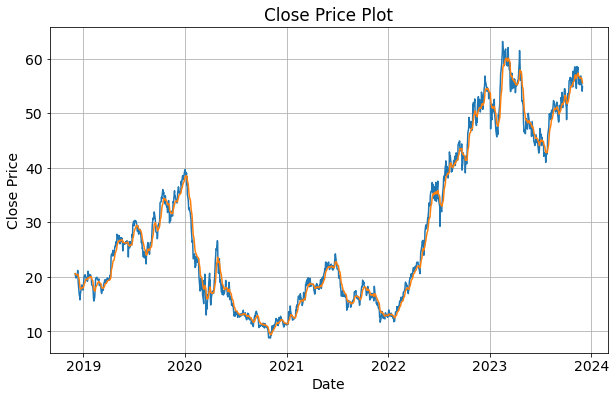

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df_dict['STNG'], marker='', linestyle='-')
sns.lineplot(x='Date', y='EMA_10', data=df_dict['STNG'], marker='', linestyle='-')

# Customize the plot
plt.title('Close Price Plot')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


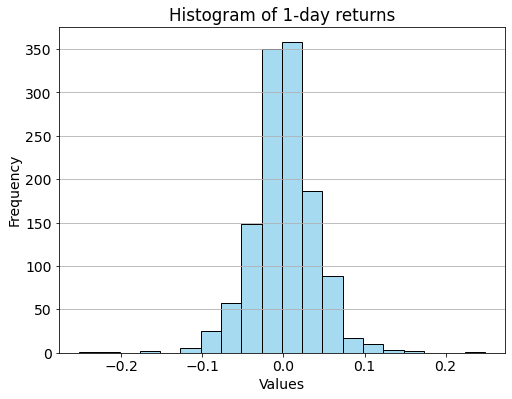

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_dict['STNG'], x='log_return', bins=20, kde=False, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Histogram of 1-day returns')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Show the plot
plt.show()

In [60]:
print(df_dict['STNG']['log_return'].mean())
print(df_dict['STNG'].loc[df_dict['STNG']['DayOfWeek']=='Friday']['log_return'].mean())


0.0007802866947038293
0.005121952369656287


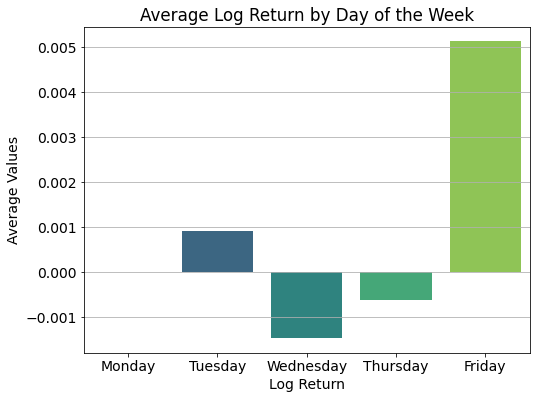

In [55]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
grouped_df = df_dict['STNG'].groupby('DayOfWeek')['log_return'].mean().reindex(day_order).reset_index()
# Plot a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='DayOfWeek', y='log_return', data=grouped_df, palette='viridis')
# Customize the plot
plt.title('Average Log Return by Day of the Week')
plt.xlabel('Log Return')
plt.ylabel('Average Values')
plt.grid(axis='y')

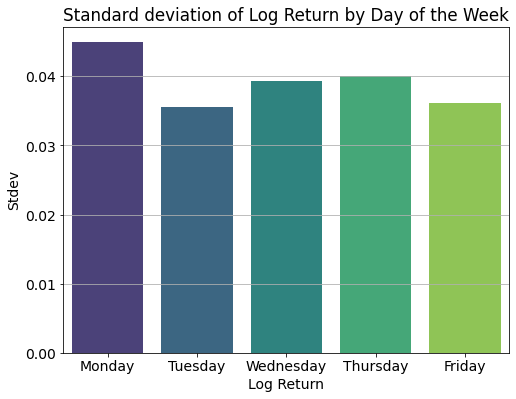

In [88]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
grouped_df = df_dict['STNG'].groupby('DayOfWeek')['log_return'].std().reindex(day_order).reset_index()
# Plot a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='DayOfWeek', y='log_return', data=grouped_df, palette='viridis')
# Customize the plot
plt.title('Standard deviation of Log Return by Day of the Week')
plt.xlabel('Log Return')
plt.ylabel('Stdev')
plt.grid(axis='y')

Not a risk premium, since Friday isn't any more volatile than the rest of them!

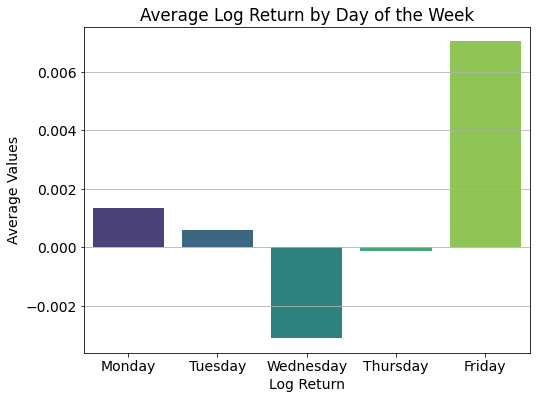

In [95]:

STNG_sampled =  df_dict['STNG'].sample(n=1000, random_state=12)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
grouped_df = STNG_sampled.groupby('DayOfWeek')['log_return'].mean().reindex(day_order).reset_index()
# Plot a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='DayOfWeek', y='log_return', data=grouped_df, palette='viridis')
# Customize the plot
plt.title('Average Log Return by Day of the Week')
plt.xlabel('Log Return')
plt.ylabel('Average Values')
plt.grid(axis='y')

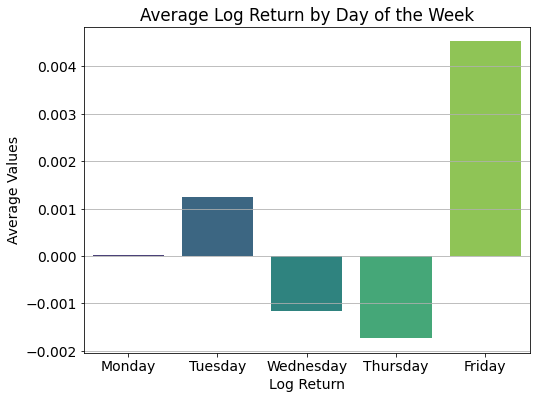

In [133]:
start_index = np.random.randint(0, len(df_dict['STNG']) - 1000)  
# Select consecutive rows from the original DataFrame

STNG_sampled =  df_dict['STNG'].iloc[start_index:start_index + 1000]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
grouped_df = STNG_sampled.groupby('DayOfWeek')['log_return'].mean().reindex(day_order).reset_index()
# Plot a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='DayOfWeek', y='log_return', data=grouped_df, palette='viridis')
# Customize the plot
plt.title('Average Log Return by Day of the Week')
plt.xlabel('Log Return')
plt.ylabel('Average Values')
plt.grid(axis='y')

The spike in Friday seems robust, samples randomly!

Now let's see what happened recently:


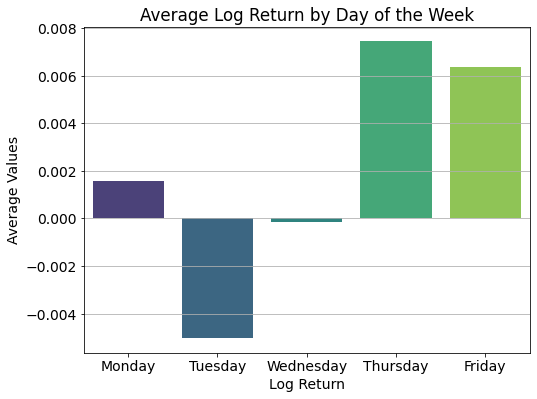

In [120]:
# day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
grouped_df = df_dict['STNG'].iloc[-100:].groupby('DayOfWeek')['log_return'].mean().reindex(day_order).reset_index()
# Plot a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='DayOfWeek', y='log_return', data=grouped_df, palette='viridis')
# Customize the plot
plt.title('Average Log Return by Day of the Week')
plt.xlabel('Log Return')
plt.ylabel('Average Values')
plt.grid(axis='y')

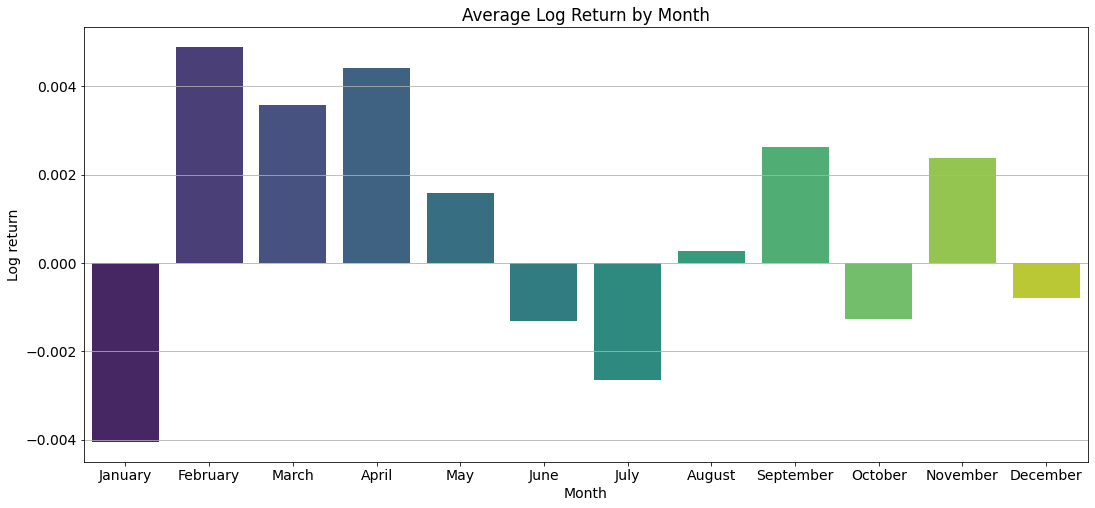

In [75]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October','November', 'December']

grouped_df = df_dict['STNG'].groupby('Month')['log_return'].mean().reindex(month_order).reset_index()
# Plot a bar chart using Seaborn
plt.figure(figsize=(18, 8))
sns.barplot(x='Month', y='log_return', data=grouped_df, palette='viridis')
# Customize the plot
plt.title('Average Log Return by Month')
plt.xlabel('Month')
plt.ylabel('Log return')
plt.grid(axis='y')

How do I investigate what total return was due to trading on Friday?

Now I want to test: size effects and mean reversion

scatter return against previous day return.
for size effect: i expect the mean reversion to be HIGHER when previous days had low volume when compared to previous days

BUILD A RANDOM TREE

also use $USO as oil beta

# Index

In [76]:
#build an index so I can hedge out broad sector-based moves
#better if i can pull market cap to weight, but i will equal-weight for now

# Model-building

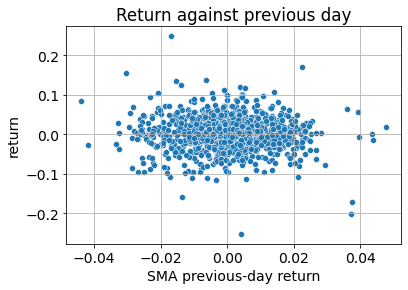

In [65]:
sns.scatterplot(x='prev_day_log_SMA_return', y='log_return', data=df_dict['STNG'])

# Customize the plot (optional)
plt.title('Return against previous day')
plt.xlabel('SMA previous-day return')
plt.ylabel('return')
plt.grid(True)

# Show the plot
plt.show()

stuff to consider: different time horizons, different features etc.
what i want to capture: mean reversion in terms of previous 1-day and 3-day returns, as well as volume effect (if previous days small volume, next days have more mean reversion)

In [78]:
#feed features into some OLS  model
#use lasso?

X = df_dict['STNG']
X

,Date,Open,High,Low,Close,Adj Close,Volume,return_1day,log_return,SMA_10,EMA_10,Day_of_week,DayOfWeek,log_SMA_10_return,prev_day_log_SMA_return,Month
0,2018-12-03,21.400000,21.700001,20.400000,20.600000,18.487772,705870,NaN,NaN,20.600000,20.600000,Monday,Monday,NaN,NaN,December
1,2018-12-04,20.600000,20.900000,20.000000,20.200001,18.217218,539920,-0.019417,-0.019608,20.400001,20.527273,Tuesday,Tuesday,-0.009756,NaN,December
2,2018-12-06,20.400000,20.600000,18.500000,19.799999,17.856480,659940,-0.019802,-0.020001,20.200000,20.395041,Thursday,Thursday,-0.009852,-0.009756,December
3,2018-12-07,20.100000,20.700001,19.799999,20.400000,18.397589,856930,0.030303,0.029853,20.250000,20.395943,Friday,Friday,0.002472,-0.009852,December
4,2018-12-10,20.400000,20.900000,19.600000,20.500000,18.487770,1160040,0.004902,0.004890,20.300000,20.414862,Monday,Monday,0.002466,0.002472,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2023-11-24,56.900002,57.570000,56.820000,56.849998,56.486973,349500,0.002822,0.002818,56.862000,56.550715,Friday,Friday,-0.000914,0.003697,November
1253,2023-11-27,56.830002,56.910000,55.759998,55.810001,55.453617,637700,-0.018294,-0.018463,56.585000,56.416040,Monday,Monday,-0.004883,-0.000914,November
1254,2023-11-28,55.799999,56.349998,54.680000,54.810001,54.460003,700100,-0.017918,-0.018080,56.251000,56.124033,Tuesday,Tuesday,-0.005920,-0.004883,November
1255,2023-11-29,54.590000,54.759998,53.580002,54.070000,54.070000,794000,-0.013501,-0.013593,55.815000,55.750572,Wednesday,Wednesday,-0.007781,-0.005920,November


I think testing volume effects is probably more useful -- I think that the Thursday and Friday pumps are quite indicative.


Also plot skew.

Can backtest this buy on Wednesday close strategy?



Just run regression on Friday returns.